<a href="https://colab.research.google.com/github/aviaga/FutureMakers/blob/main/Day%2018%20(7-23)%20-%20Project%20(Supplemental)%20on%20Creating%20a%20Model%20for%20House%20Prices%20(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Introduction
This is the implementation of the supplemental activity of Day 18's Action Item for SureStart's summer program, 2021. The modified line of code is under Model 1; no other sections have been changed from earlier. 

The tutorial for this model development activity can be found [ here](https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4)



# Model 1

 **Data Preprocessing Steps**

In [31]:
#Importing necessary libraries
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [32]:
#Importing dataset 
from google.colab import files
uploaded = files.upload()

Saving housepricedata.csv to housepricedata (1).csv


In [33]:
#Importing dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['housepricedata.csv']))

In [34]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [35]:
#Converting data to array format
dataset = df.values

In [36]:
#Assigning first 10 columns of data in array to x
X = dataset[:,0:10]

In [37]:
#Assigning last column of data in array to y
Y = dataset[:,10]

In [38]:
#Scaling data for normalization
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [39]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [40]:
#Splitting dataset into train, test, and validation sets
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [41]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


**Building and Training the Model**

In [42]:
#Importing necessary libraries
from keras.models import Sequential
from keras.layers import Dense

In [43]:
#Defining model architecture/structure
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [44]:
# Model configuration
# CHANGED LOSS TO MEAN SQUARED ERROR
model.compile(optimizer='sgd',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [47]:
#Training model
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1137 - accuracy: 0.8748 - val_loss: 0.1177 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.8748 - val_loss: 0.1170 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1124 - accuracy: 0.8748 - val_loss: 0.1156 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1118 - accuracy: 0.8748 - val_loss: 0.1152 - val_accuracy: 0.8584
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1114 - accuracy: 0.8777 - val_loss: 0.1148 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1107 - accuracy: 0.8796 - val_loss: 0.1147 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 0.8738 - val_loss: 0.1139 - val_accuracy: 0.8584
Epoch 8/100
3

In [48]:
#Evaluating model on test dataset
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.0853 - accuracy: 0.8813


0.8812785148620605

**Visualizing Loss & Accuracy**

In [17]:
#Import library
import matplotlib.pyplot as plt

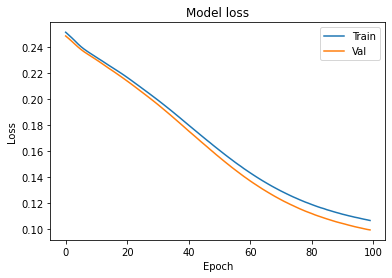

In [18]:
#Visualizing the loss of the model on the training and validation dataset
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

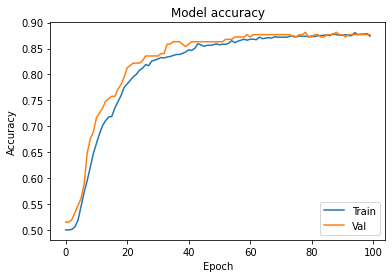

In [19]:
#Visualizing the accuracy of the model on the training and validation dataset
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Showcasing the Need for Regularization - Making Another Model

In [20]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [21]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 47ms/step - loss: 0.5881 - accuracy: 0.6703 - val_loss: 0.3898 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3445 - accuracy: 0.8686 - val_loss: 0.3137 - val_accuracy: 0.8767
Epoch 3/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2967 - accuracy: 0.8872 - val_loss: 0.3206 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3333 - accuracy: 0.8577 - val_loss: 0.2700 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2470 - accuracy: 0.9105 - val_loss: 0.2735 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2568 - accuracy: 0.8978 - val_loss: 0.3324 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2877 - accuracy: 0.8778 - val_loss: 0.2491 - val_accuracy: 0.8995
Epoch 

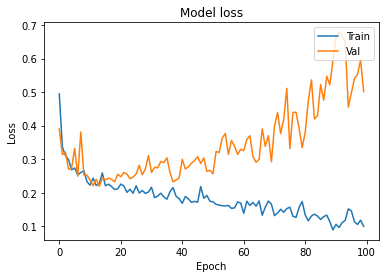

In [23]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

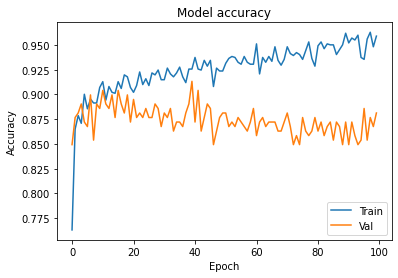

In [24]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Additional Model to Reduce the Over-Fitting in Model 2

In [25]:
from keras.layers import Dropout
from keras import regularizers

In [26]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [27]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 63ms/step - loss: 21.1246 - accuracy: 0.5593 - val_loss: 3.8667 - val_accuracy: 0.8311
Epoch 2/100
32/32 [==============================] - 2s 48ms/step - loss: 2.4821 - accuracy: 0.8502 - val_loss: 0.6711 - val_accuracy: 0.8311
Epoch 3/100
32/32 [==============================] - 2s 49ms/step - loss: 0.5700 - accuracy: 0.8799 - val_loss: 0.4818 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 2s 50ms/step - loss: 0.5293 - accuracy: 0.8604 - val_loss: 0.4545 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 2s 48ms/step - loss: 0.4760 - accuracy: 0.8891 - val_loss: 0.4815 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 2s 48ms/step - loss: 0.4849 - accuracy: 0.8848 - val_loss: 0.4475 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 2s 47ms/step - loss: 0.5009 - accuracy: 0.8613 - val_loss: 0.4277 - val_accuracy: 0.8950
Epoch

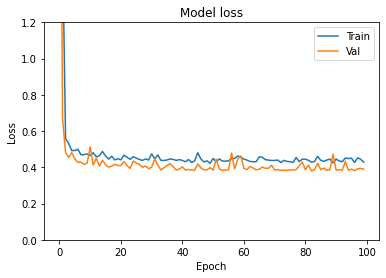

In [29]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

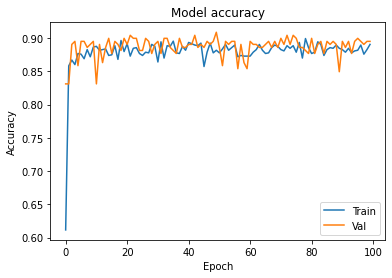

In [30]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()